In [6]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [7]:
import pandas as pd
import polars as pl

BASE_PATH = r"C:\Users\Muhammad Harits\Documents\transaction dataset"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape)
print(test_transaction.shape)


(590540, 394)
(506691, 393)


In [8]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Pada bagian training, kode memuat dataset transaksi kemudian memisahkan fitur numerik dan label isFraud, mengatasi nilai hilang menggunakan imputasi median, dan melakukan normalisasi melalui StandardScaler agar seluruh fitur berada pada skala yang seragam. Setelah itu, data dibagi menjadi train–test, lalu dihitung class weight untuk mengatasi ketidakseimbangan kelas agar model tidak bias terhadap transaksi yang bukan fraud. Model Neural Network sederhana dengan dua lapisan tersembunyi dibangun menggunakan TensorFlow, kemudian dilatih dengan data yang sudah diproses dan class weight, serta disimpan bersama objek preprocessing agar bisa digunakan kembali. Pada bagian prediction, sistem memuat kembali model dan objek preprocessing (imputer, scaler, dan daftar fitur), lalu membaca file test_transaction.csv, memastikan kolom fitur konsisten dengan data training, menerapkan imputasi dan normalisasi yang sama, kemudian menghasilkan proabilitas fraud melalui model. Nilai probabilitas tersebut dikonversi menjadi label biner 0 atau 1 menggunakan ambang batas 0.5, dan hasil akhirnya disimpan ke dalam submission.csv berisi TransactionID dan isFraud

TensorFlow version: 2.20.0
Num GPUs: 0
Dataset shape: (590540, 394)
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336

c:\Users\Muhammad Harits\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,433 (103.25 KB)

 Trainable params: 26,433 (103.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8353 - loss: 0.4961 - val_AUC: 0.8616 - val_loss: 0.4190
Epoch 2/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8703 - loss: 0.4455 - val_AUC: 0.8701 - val_loss: 0.4018
Epoch 3/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8818 - loss: 0.4270 - val_AUC: 0.8748 - val_loss: 0.4448
Epoch 4/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.8900 - loss: 0.4134 - val_AUC: 0.8821 - val_loss: 0.3620
Epoch 5/5
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.8970 - loss: 0.4010 - val_AUC: 0.8851 - val_loss: 0.3633


Saved best model to best_fraud_model.h5
3691/3691 ━━━━━━━━━━━━━━━━━━━━ 2s 525us/step
Test ROC AUC: 0.8848326941436754


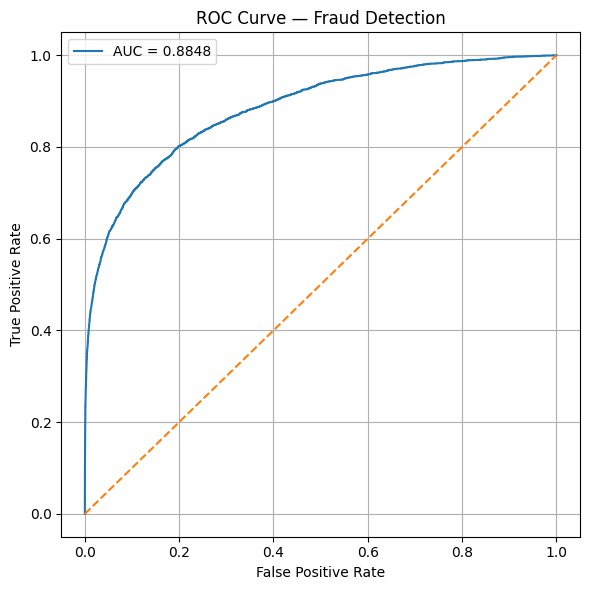

ROC curve saved as roc_curve.png


In [ ]:
# ============================================================
# 1. Imports
# ============================================================
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer

print("TensorFlow version:", tf.__version__)
print("Num GPUs:", len(tf.config.list_physical_devices('GPU')))


# ============================================================
# 2. Load Dataset
# ============================================================
CSV_PATH = f"{BASE_PATH}/train_transaction.csv"

df = pd.read_csv(CSV_PATH)
print("Dataset shape:", df.shape)
print(df.head())


# ==============================================================
# 3. Pra-pemrosesan
# - Pisahkan label
# - Pertahankan hanya kolom numerik
# - Imputasi nilai yang hilang
# - Scale fitur
# ================================================================

# Label
y = df["isFraud"].astype(int)

# Hanya kolom numerik (aman untuk NN tanpa pengkodean)
X = df.select_dtypes(include=[np.number]).drop(columns=["isFraud"], errors="ignore")

print("Numeric features:", X.shape[1])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Imputasi NaN
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

# Scale nilai
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

with open("imputer.pkl", "wb") as f:
    pickle.dump(imputer, f)

# Simpan scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Simpan nama kolom fitur
feature_columns = df.select_dtypes(include=[np.number]).drop(columns=["isFraud"]).columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

print("Saved imputer.pkl, scaler.pkl, and feature_columns.pkl")


# ============================================================
# 4. Atasi Ketidakseimbangan Kelas dengan Bobot Kelas
# ==============================================================
classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weights = {i: weights[i] for i in range(len(classes))}

print("Class weights:", class_weights)

# ==============================================================
# 5. Bangun Model TensorFlow
# Simple dense model untuk kecepatan
# ================================================================
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="relu", input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="binary_crossentropy",
        metrics=["AUC"]
    )
    return model


model = build_model(X_train.shape[1])
model.summary()


# ============================================================
# 6. Train Model
# ============================================================
EPOCHS = 5
BATCH_SIZE = 2048

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    verbose=1
)

model.save("best_fraud_model.h5")
print("Saved best model to best_fraud_model.h5")


# ============================================================
# 7. Evaluasi
# ============================================================
y_pred_proba = model.predict(X_test).ravel()
auc = roc_auc_score(y_test, y_pred_proba)
print("Test ROC AUC:", auc)


# ============================================================
# 8. Generate Kurva ROC
# ==============================================================
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Fraud Detection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve.png")
plt.show()

print("ROC curve saved as roc_curve.png")

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pickle

# ==============================================================
# 1. Muat set data test
# ==============================================================
TEST_CSV = f"{BASE_PATH}/test_transaction.csv"
df_test = pd.read_csv(TEST_CSV)

TransactionID = df_test["TransactionID"]


# ============================================================
# 2. Muat objek praproses yang tersimpan + model
# ==============================================================
with open("imputer.pkl", "rb") as f:
    imputer = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("feature_columns.pkl", "rb") as f:
    TRAIN_FEATURES = pickle.load(f)

model = keras.models.load_model("best_fraud_model.h5")


# ============================================================
# 3. Dataset uji praproses (harus sesuai dengan data training)
# ================================================================
X_test = df_test.select_dtypes(include=[np.number])

# Tambahkan kolom yang hilang
for col in TRAIN_FEATURES:
    if col not in X_test.columns:
        X_test[col] = 0

# Hapus kolom tambahan
X_test = X_test[TRAIN_FEATURES]

# Konversi ke numpy
X_test = X_test.values

# Terapkan imputer + scaler
X_test = imputer.transform(X_test)
X_test = scaler.transform(X_test)


# ============================================================
# 4. Prediksi probabilitas → konversi ke 0/1
# ==============================================================
prob = model.predict(X_test, batch_size=1024).ravel()

# Konversi probabilitas → biner (0 atau 1)
binary_pred = (prob >= 0.5).astype(int)


# ============================================================
# 5. Simpan submission.csv
# ==============================================================
submission = pd.DataFrame({
    "TransactionID": TransactionID,
    "isFraud": binary_pred
})

submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")
print(submission.head())

c:\Users\Muhammad Harits\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Saved submission.csv
   TransactionID  isFraud
0        3663549        0
1        3663550        0
2        3663551        0
3        3663552        0
4        3663553        0
